1. Problem Description


# Student Performance Prediction
This project aims to predict students' academic performance based on demographic and educational factors. Specifically, we will:
- Explore how features such as gender, parental education, and test preparation impact scores.
- Build machine learning models to predict math and reading scores.

## Dataset
The dataset contains 1,000 samples with the following features:
- **gender**: Male or female.
- **race/ethnicity**: Group categories (e.g., group A, group B, etc.).
- **parental level of education**: Highest level of education achieved by parents.
- **lunch**: Type of lunch (standard or free/reduced).
- **test preparation course**: Whether a student completed a preparation course.
- **math score** and **reading score**: Numeric scores for evaluation.
Data was taken from https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
## Goals
- Perform exploratory data analysis to uncover patterns in student performance.
- Train machine learning models to predict academic scores based on input features.
- Evaluate model performance and draw insights about the data and predictions.



2. Data Exploration


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Descriptive Statistics:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      

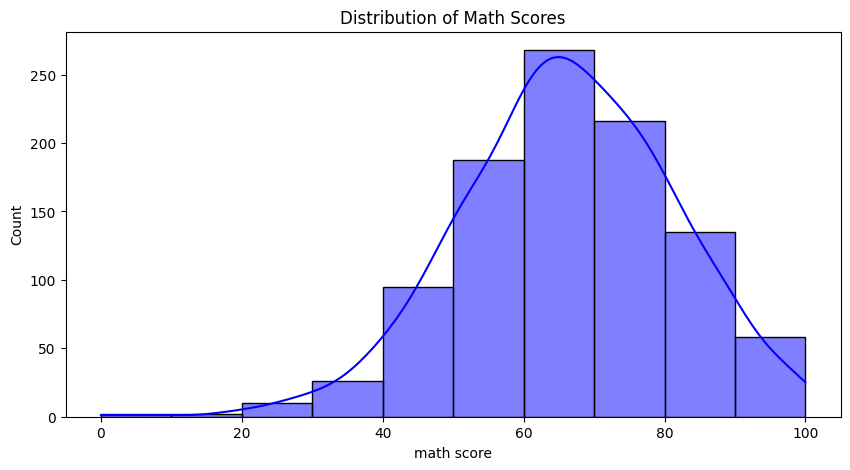

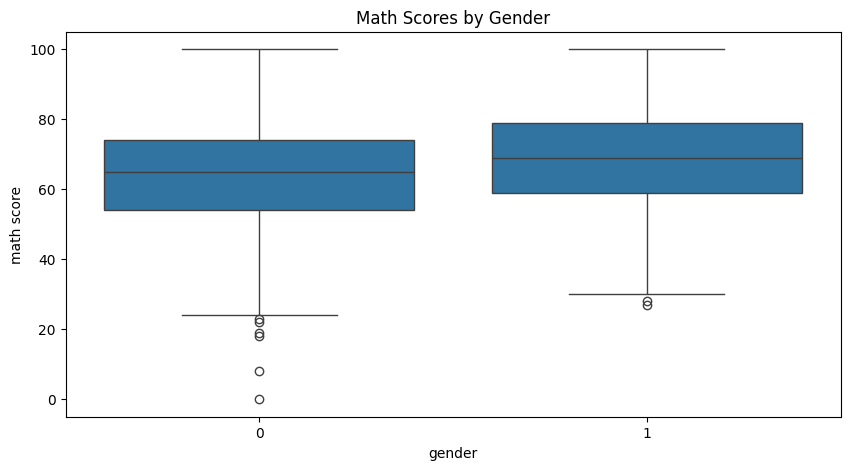

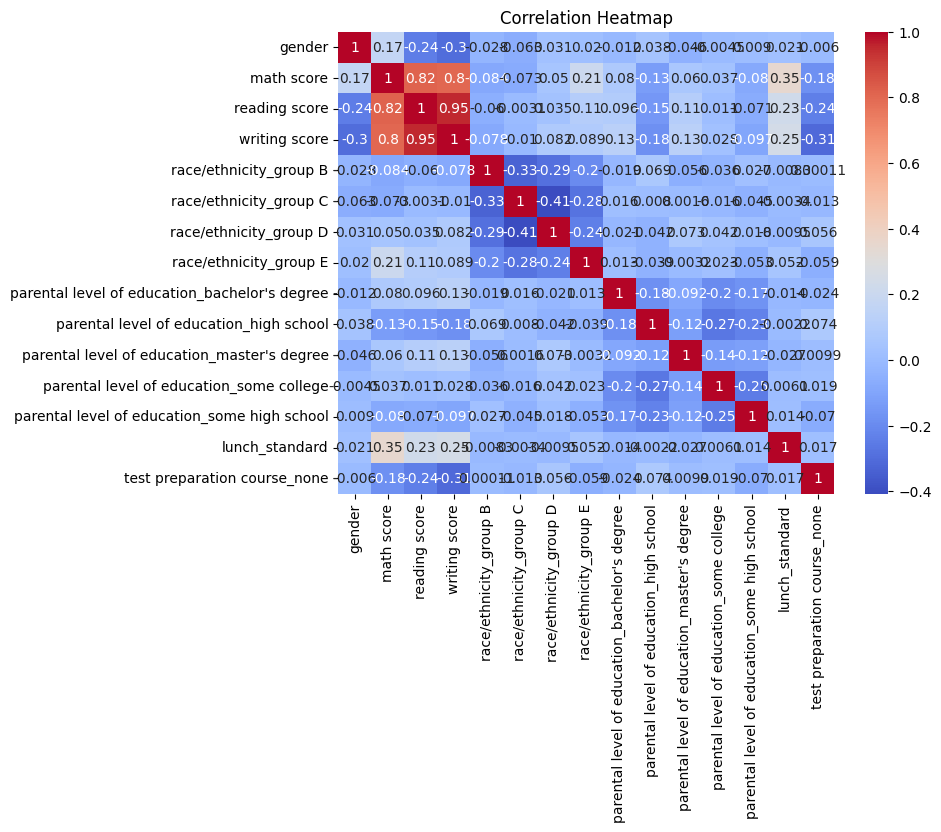

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("StudentsPerformance.csv") 
df.head()

print("Dataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())


categorical_columns = [ 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded['gender'] = df_encoded['gender'].map({'female': 0, 'male': 1})
print(df_encoded.head())


plt.figure(figsize=(10, 5))
sns.histplot(df_encoded['math score'], kde=True, bins=10, color="blue")
plt.title("Distribution of Math Scores")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='gender', y='math score', data=df_encoded)
plt.title("Math Scores by Gender")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Key Observations
Strong Correlations:

math score, reading score, and writing score:
Correlations between these scores are very high (e.g., reading score and writing score: 0.95).
Indicates that these scores are strongly interrelated.
Moderate Positive Correlations:

lunch_standard with math score (0.35):
Suggests students with a standard lunch tend to perform better in math.
parental level of education_bachelor's degree with writing score (0.13):
Indicates a slight positive impact of parental education on writing performance.
Negative Correlations:

test preparation course_none with all scores:
Correlation with math score (-0.18), reading score (-0.24), and writing score (-0.31).
Suggests that not taking a preparation course is associated with lower scores.
Weak Correlations:

Most categorical variables like race/ethnicity show low correlations with scores, which might mean their impact is minimal.

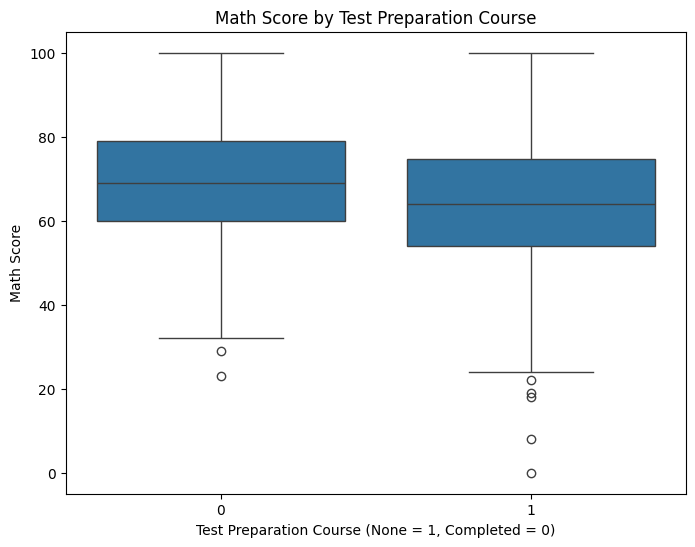

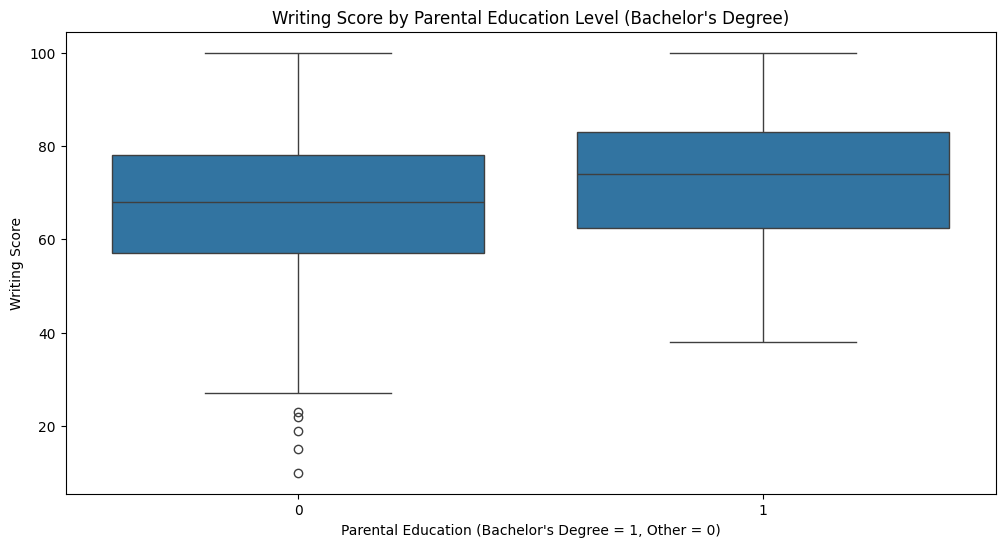

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='test preparation course_none', y='math score', data=df_encoded)
plt.title('Math Score by Test Preparation Course')
plt.xlabel('Test Preparation Course (None = 1, Completed = 0)')
plt.ylabel('Math Score')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='parental level of education_bachelor\'s degree', y='writing score', data=df_encoded)
plt.title('Writing Score by Parental Education Level (Bachelor\'s Degree)')
plt.xlabel('Parental Education (Bachelor\'s Degree = 1, Other = 0)')
plt.ylabel('Writing Score')
plt.show()


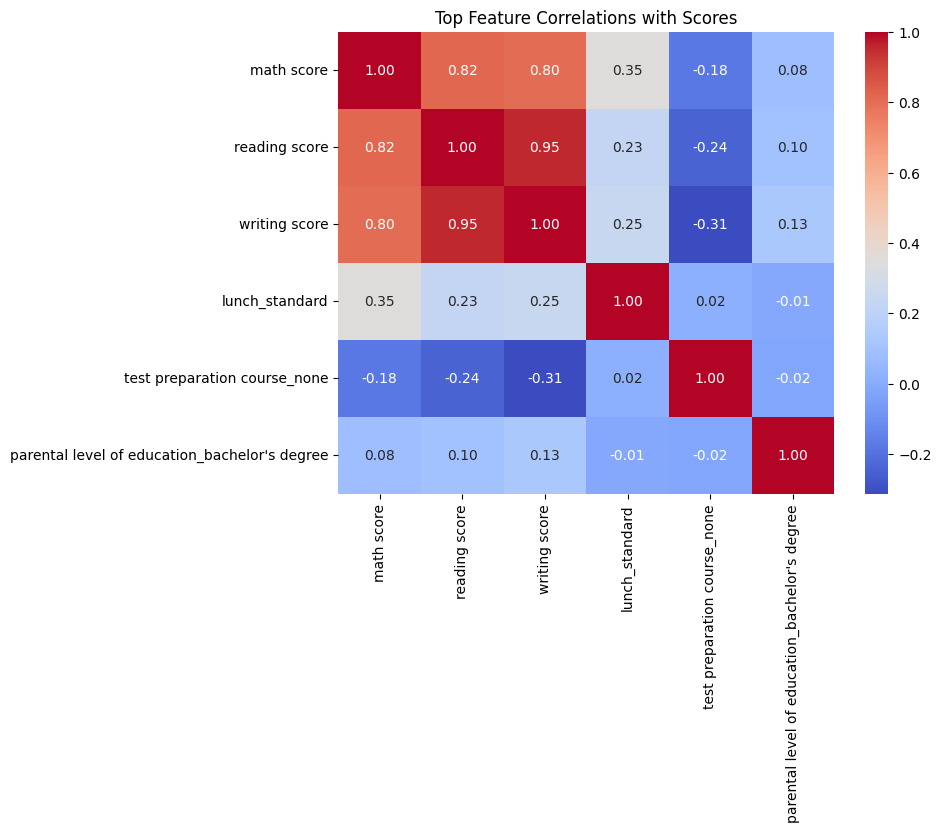

In [3]:
top_features = ['math score', 'reading score', 'writing score', 'lunch_standard', 
                'test preparation course_none', 'parental level of education_bachelor\'s degree']

plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[top_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top Feature Correlations with Scores")
plt.show()


In [4]:
threshold = 0.1

correlations = df_encoded.corr()['math score']

selected_features = correlations[correlations.abs() > threshold].index.tolist()

selected_features.remove('math score')

X_selected = df_encoded[selected_features]
y = df_encoded['math score']

print("Selected Features for Math Score Prediction:")
print(selected_features)


Selected Features for Math Score Prediction:
['gender', 'reading score', 'writing score', 'race/ethnicity_group E', 'parental level of education_high school', 'lunch_standard', 'test preparation course_none']


3. Data Preprocessing


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


4. Model Building and Training

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {"MAE": mae, "RMSE": rmse, "R2 Score": r2}

results_df = pd.DataFrame(results).T
print("Model Performance:")
print(results_df)


Model Performance:
                        MAE       RMSE  R2 Score
Linear Regression  4.174940  28.610762  0.882424
Decision Tree      6.255000  63.822500  0.737721
Random Forest      4.801144  37.370078  0.846428


5. Results and Analysis

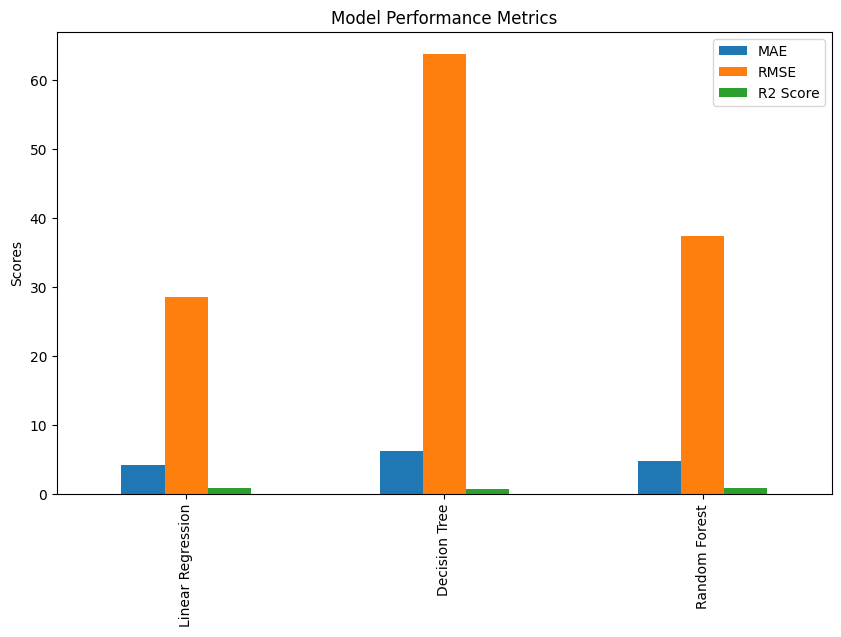

In [ ]:
results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Metrics")
plt.ylabel("Scores")
plt.show()

6. Discussion and Conclusion


## Discussion and Conclusion

### Model Performance Interpretation

Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual values. Lower is better!

Root Mean Squared Error (RMSE):Similar to MAE but penalizes larger errors more heavily. Lower is better!

R² Score: Indicates how well the model explains the variance in the data. Higher is better!


#### The best-performing model was Linear Regression with the highest R2 score and lowest RMSE.





## Model Tuning

Using GridSearchCV to find optimal parameters

In [8]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


Retrain Decision Tree with best parameters

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

optimized_decision_tree = DecisionTreeRegressor(
    max_depth=5,
    min_samples_leaf=5,
    min_samples_split=2,
    random_state=42
)

optimized_decision_tree.fit(X_train, y_train)

y_pred_optimized = optimized_decision_tree.predict(X_test)

mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
rmse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("Optimized Decision Tree Performance:")
print(f"MAE: {mae_optimized:.2f}")
print(f"RMSE: {rmse_optimized:.2f}")
print(f"R2 Score: {r2_optimized:.2f}")

results["Optimized Decision Tree"] = {
    "MAE": mae_optimized,
    "RMSE": rmse_optimized,
    "R2 Score": r2_optimized
}

results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df)

Optimized Decision Tree Performance:
MAE: 4.90
RMSE: 40.33
R2 Score: 0.83
Model Performance Comparison:
                              MAE       RMSE  R2 Score
Linear Regression        4.174940  28.610762  0.882424
Decision Tree            6.255000  63.822500  0.737721
Random Forest            4.801144  37.370078  0.846428
Optimized Decision Tree  4.899968  40.325329  0.834283


random forest feature importance

In [10]:
feature_importances = models["Random Forest"].feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                                   Feature  Importance
1                            reading score    0.577282
2                            writing score    0.247404
0                                   gender    0.121250
5                           lunch_standard    0.017805
6             test preparation course_none    0.014223
3                   race/ethnicity_group E    0.013963
4  parental level of education_high school    0.008074


Key Observations
Top Features:

reading score (57.7%) and writing score (24.7%) dominate in importance.
These scores are strongly correlated with math score, as observed in the correlation matrix.

Moderately Important Features:

gender (12.1%) contributes meaningfully to predicting math score.

Low Importance Features:

Features like lunch_standard (1.8%) and test preparation course_none (1.4%) have minimal impact.
race/ethnicity_group E (1.4%) and parental level of education_high school (0.8%) also have low importance.

Continue to fine tune the random forest model

In [11]:
X_reduced = X_selected.drop(columns=['parental level of education_high school', 'race/ethnicity_group E'])

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

rf_reduced = RandomForestRegressor(random_state=42)
rf_reduced.fit(X_train_red, y_train_red)

y_pred_red = rf_reduced.predict(X_test_red)
mae_red = mean_absolute_error(y_test_red, y_pred_red)
rmse_red = mean_squared_error(y_test_red, y_pred_red,)
r2_red = r2_score(y_test_red, y_pred_red)

print(f"Reduced Random Forest Performance:\nMAE: {mae_red:.2f}, RMSE: {rmse_red:.2f}, R² Score: {r2_red:.2f}")


results["Reduced Random Forest"] = {
    "MAE": mae_red,
    "RMSE": rmse_red,
    "R2 Score": r2_red
}

results_df = pd.DataFrame(results).T

print("Model Performance Comparison:")
print(results_df)


Reduced Random Forest Performance:
MAE: 5.00, RMSE: 40.21, R² Score: 0.83
Model Performance Comparison:
                              MAE       RMSE  R2 Score
Linear Regression        4.174940  28.610762  0.882424
Decision Tree            6.255000  63.822500  0.737721
Random Forest            4.801144  37.370078  0.846428
Optimized Decision Tree  4.899968  40.325329  0.834283
Reduced Random Forest    5.002619  40.206154  0.834773


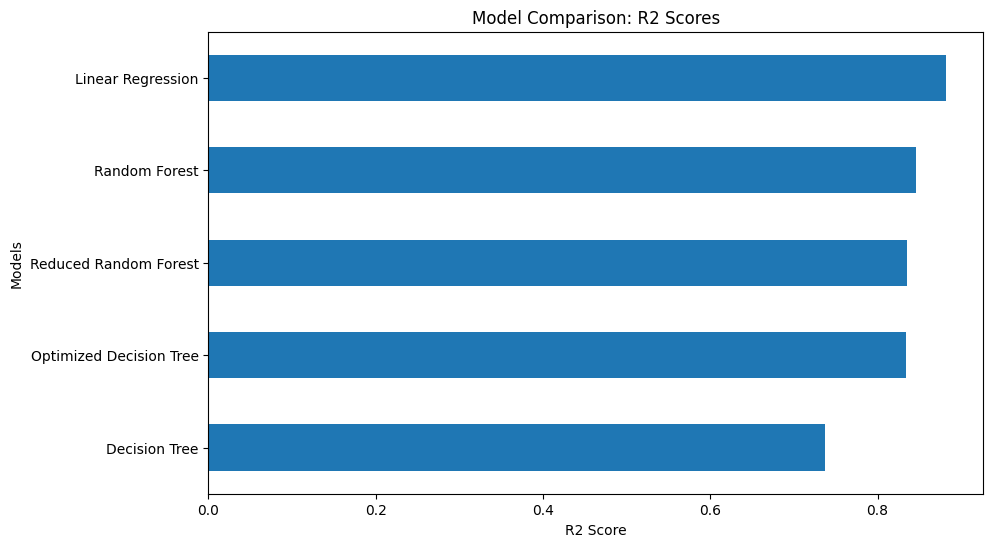

In [ ]:
import matplotlib.pyplot as plt

results_df['R2 Score'].sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Model Comparison: R2 Scores')
plt.xlabel('R2 Score')
plt.ylabel('Models')
plt.show()


Again, Linear regression won out with the r2 score of .882!